Image loaded successfully


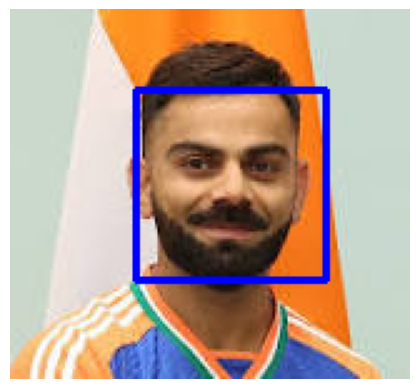

In [2]:
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained Haar Cascade XML file for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to detect faces in an image
def detect_faces(image_path):
    # Read the image
    img = cv2.imread(image_path)
    
    # Check if the image was loaded properly
    if img is None:
        print(f"Error: Unable to open image file {image_path}")
        return
    else:
        print("Image loaded successfully")
    
    # Convert to grayscale (Haar Cascades work better with grayscale images)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    # Convert BGR image to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image with detected faces
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

# Specify the path to your image
image_path = 'C:/Users/Admin/Downloads/download.jfif'  # Replace with your correct image path
detect_faces(image_path)


Image loaded successfully


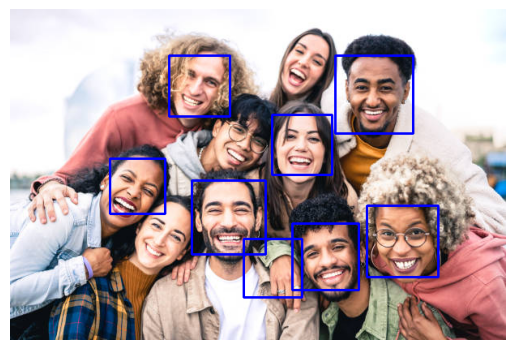

In [3]:
#Using Haarcascade 

# Import necessary libraries
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained Haar Cascade XML file for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to detect faces in an image
def detect_faces(image_path):
    # Read the image
    img = cv2.imread(image_path)
    
    # Check if the image was loaded properly
    if img is None:
        print(f"Error: Unable to open image file {image_path}")
        return
    else:
        print("Image loaded successfully")
    
    # Convert to grayscale (Haar Cascades work better with grayscale images)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=7, minSize=(30, 30))
    
    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    # Convert BGR image to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image with detected faces
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

# Specify the path to your image
image_path = 'C:/Users/Admin/Downloads/i.jpg'  # Replace with your correct image path
detect_faces(image_path)


Image loaded successfully


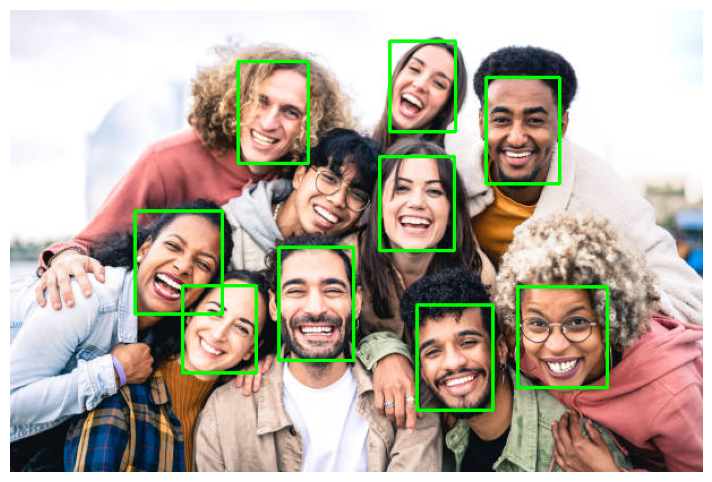

In [2]:
#Using DNN Model
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained deep learning face detection model
net = cv2.dnn.readNetFromCaffe(
    'C:/models/deploy.prototxt',  # Path to the 'deploy.prototxt' file
    'C:/models/res10_300x300_ssd_iter_140000_fp16.caffemodel'  # Path to the .caffemodel file
)

# Function to detect faces in an image using DNN model
def detect_faces_dnn(image_path):
    # Read the image
    img = cv2.imread(image_path)
    
    # Check if the image was loaded properly
    if img is None:
        print(f"Error: Unable to open image file {image_path}")
        return
    else:
        print("Image loaded successfully")
    
    # Get the height and width of the image
    (h, w) = img.shape[:2]
    
    # Prepare the image for deep learning model
    blob = cv2.dnn.blobFromImage(img, 1.0, (300, 300), (104.0, 177.0, 123.0))
    net.setInput(blob)
    
    # Perform face detection
    detections = net.forward()

    # Loop over the detections
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        # Only proceed if confidence is above a certain threshold (0.5 in this case)
        if confidence > 0.5:
            # Compute the coordinates of the bounding box
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # Draw a rectangle around the detected face
            cv2.rectangle(img, (startX, startY), (endX, endY), (0, 255, 0), 2)

    # Convert the image from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the output image with detected faces using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes ticks
    plt.show()

# Specify the path to your image
image_path = 'C:/Users/Admin/Downloads/i.jpg'  # Replace with your correct image path
detect_faces_dnn(image_path)


In [ ]:
#Face detection in video
# Import necessary libraries
import cv2
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Load the pre-trained Haar Cascade XML file for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to detect faces in a video clip
def detect_faces_in_video(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if the video was opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Loop over each frame in the video
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        # If the frame was not captured correctly, exit the loop
        if not ret:
            print("Finished processing video.")
            break

        # Convert the frame to grayscale (Haar Cascades work better with grayscale images)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Draw rectangles around detected faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Convert the frame from BGR to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display the frame with detected faces using matplotlib
        plt.imshow(frame_rgb)
        plt.axis('off')
        display(plt.gcf())
        clear_output(wait=True)

        # Pause for a brief moment
        plt.pause(0.01)

    # Release the video capture object
    cap.release()
    plt.close()

# Specify the path to your video
video_path = 'C:/Users/Admin/Downloads/vid3.mp4'  # Replace with your video file path

# Call the function to detect faces in the video
detect_faces_in_video(video_path)


In [4]:
#Face detection by webcam
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained Haar Cascade XML file for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to detect faces using the webcam
def detect_faces_from_camera():
    # Start video capture from the webcam
    cap = cv2.VideoCapture(0)  # 0 is typically the default camera index

    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return

    # Continuously capture frames from the webcam
    while True:
        # Read a frame from the webcam
        ret, frame = cap.read()
        
        # If the frame was not captured correctly, exit the loop
        if not ret:
            print("Error: Could not read frame.")
            break
        
        # Convert to grayscale (Haar Cascades work better with grayscale images)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Detect faces in the frame
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        
        # Draw rectangles around detected faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Display the frame with detected faces
        cv2.imshow('Face Detection', frame)
        
        # Press 'q' to exit the webcam stream
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # Release the webcam and close windows
    cap.release()
    cv2.destroyAllWindows()

# Call the function to start face detection using the webcam
detect_faces_from_camera()
